In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
import os


# Mac OS의 경우와 그 외 OS의 경우로 나누어 설정

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

In [3]:
# generate data: 월평균 주가

# 월
m2020 = ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12']

# 삼성전자 월평균 주가
sec = [58842, 58988, 50357, 49086, 49086, 52968, 54828, 57170, 58176, 59787, 63255, 73343]

# 카카오 월평균 주가
kakao = [32640, 35182, 31920, 33615, 45613, 52834, 64459, 74602, 75905, 71392, 72355, 75260]

# LG전자 월평균 주가
lge = [68860, 65820, 52949, 52748, 56216, 65089, 70857, 84090, 89524, 90789, 87202, 99738]

# 현대자동차 월평균 주가
hdm = [119700, 128012,  91800,  93258,  94808, 103291, 111326, 158588, 176226, 173697, 176762, 189095]

# 입력됐는지 확인
print("# 2020년 1월 ~ 12월")
print("-            월:", m2020)
print("- 삼성전자 주가:", sec)

# 2020년 1월 ~ 12월
-            월: ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12']
- 삼성전자 주가: [58842, 58988, 50357, 49086, 49086, 52968, 54828, 57170, 58176, 59787, 63255, 73343]


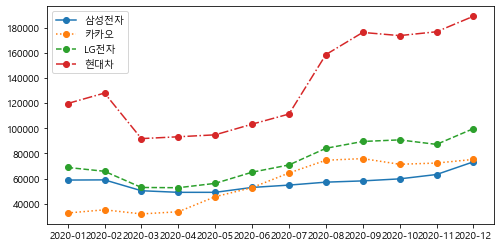

In [4]:
# 1. 상태기반(state-based): 앞서 그려진 그림 전체를 호출, figure에 내용 추가할 때 위치 확인하는 작업필요, y축 scale다를 때 겹쳐서 그려짐
# 4개의 입력을 차례로 그림 
# 색깔은 tab10 차용 

plt.figure(figsize=(8, 4))
plt.plot(m2020, sec, "o-", label="삼성전자") # 원형마크가 있는 대쉬 
plt.plot(m2020, kakao, "o:", label="카카오")
plt.plot(m2020, lge, "o--", label="LG전자")
plt.plot(m2020, hdm, "o-.", label="현대차")
plt.legend()

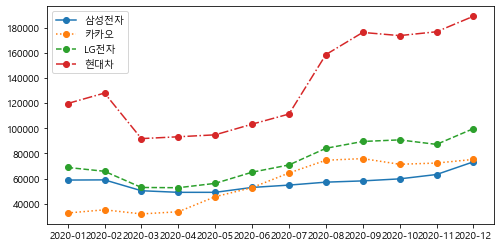

In [5]:
# 2. 객체지향(object-oriented): 데이터가 추가될 공간만 호출, 여러 데이터 얹을 때 추천, 왼쪽 오른쪽 y축 다른 scale 지정 가능 
# seaborn, pandas 연계할 때도 좋음 
# fig는 도화지를 의미, ax는 그림그릴 좌표축 


fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(m2020, sec, "o-", label="삼성전자") # ax 좌표축에다가 그림 
ax.plot(m2020, kakao, "o:", label="카카오")
ax.plot(m2020, lge, "o--", label="LG전자")
ax.plot(m2020, hdm, "o-.", label="현대차")
ax.legend()

# 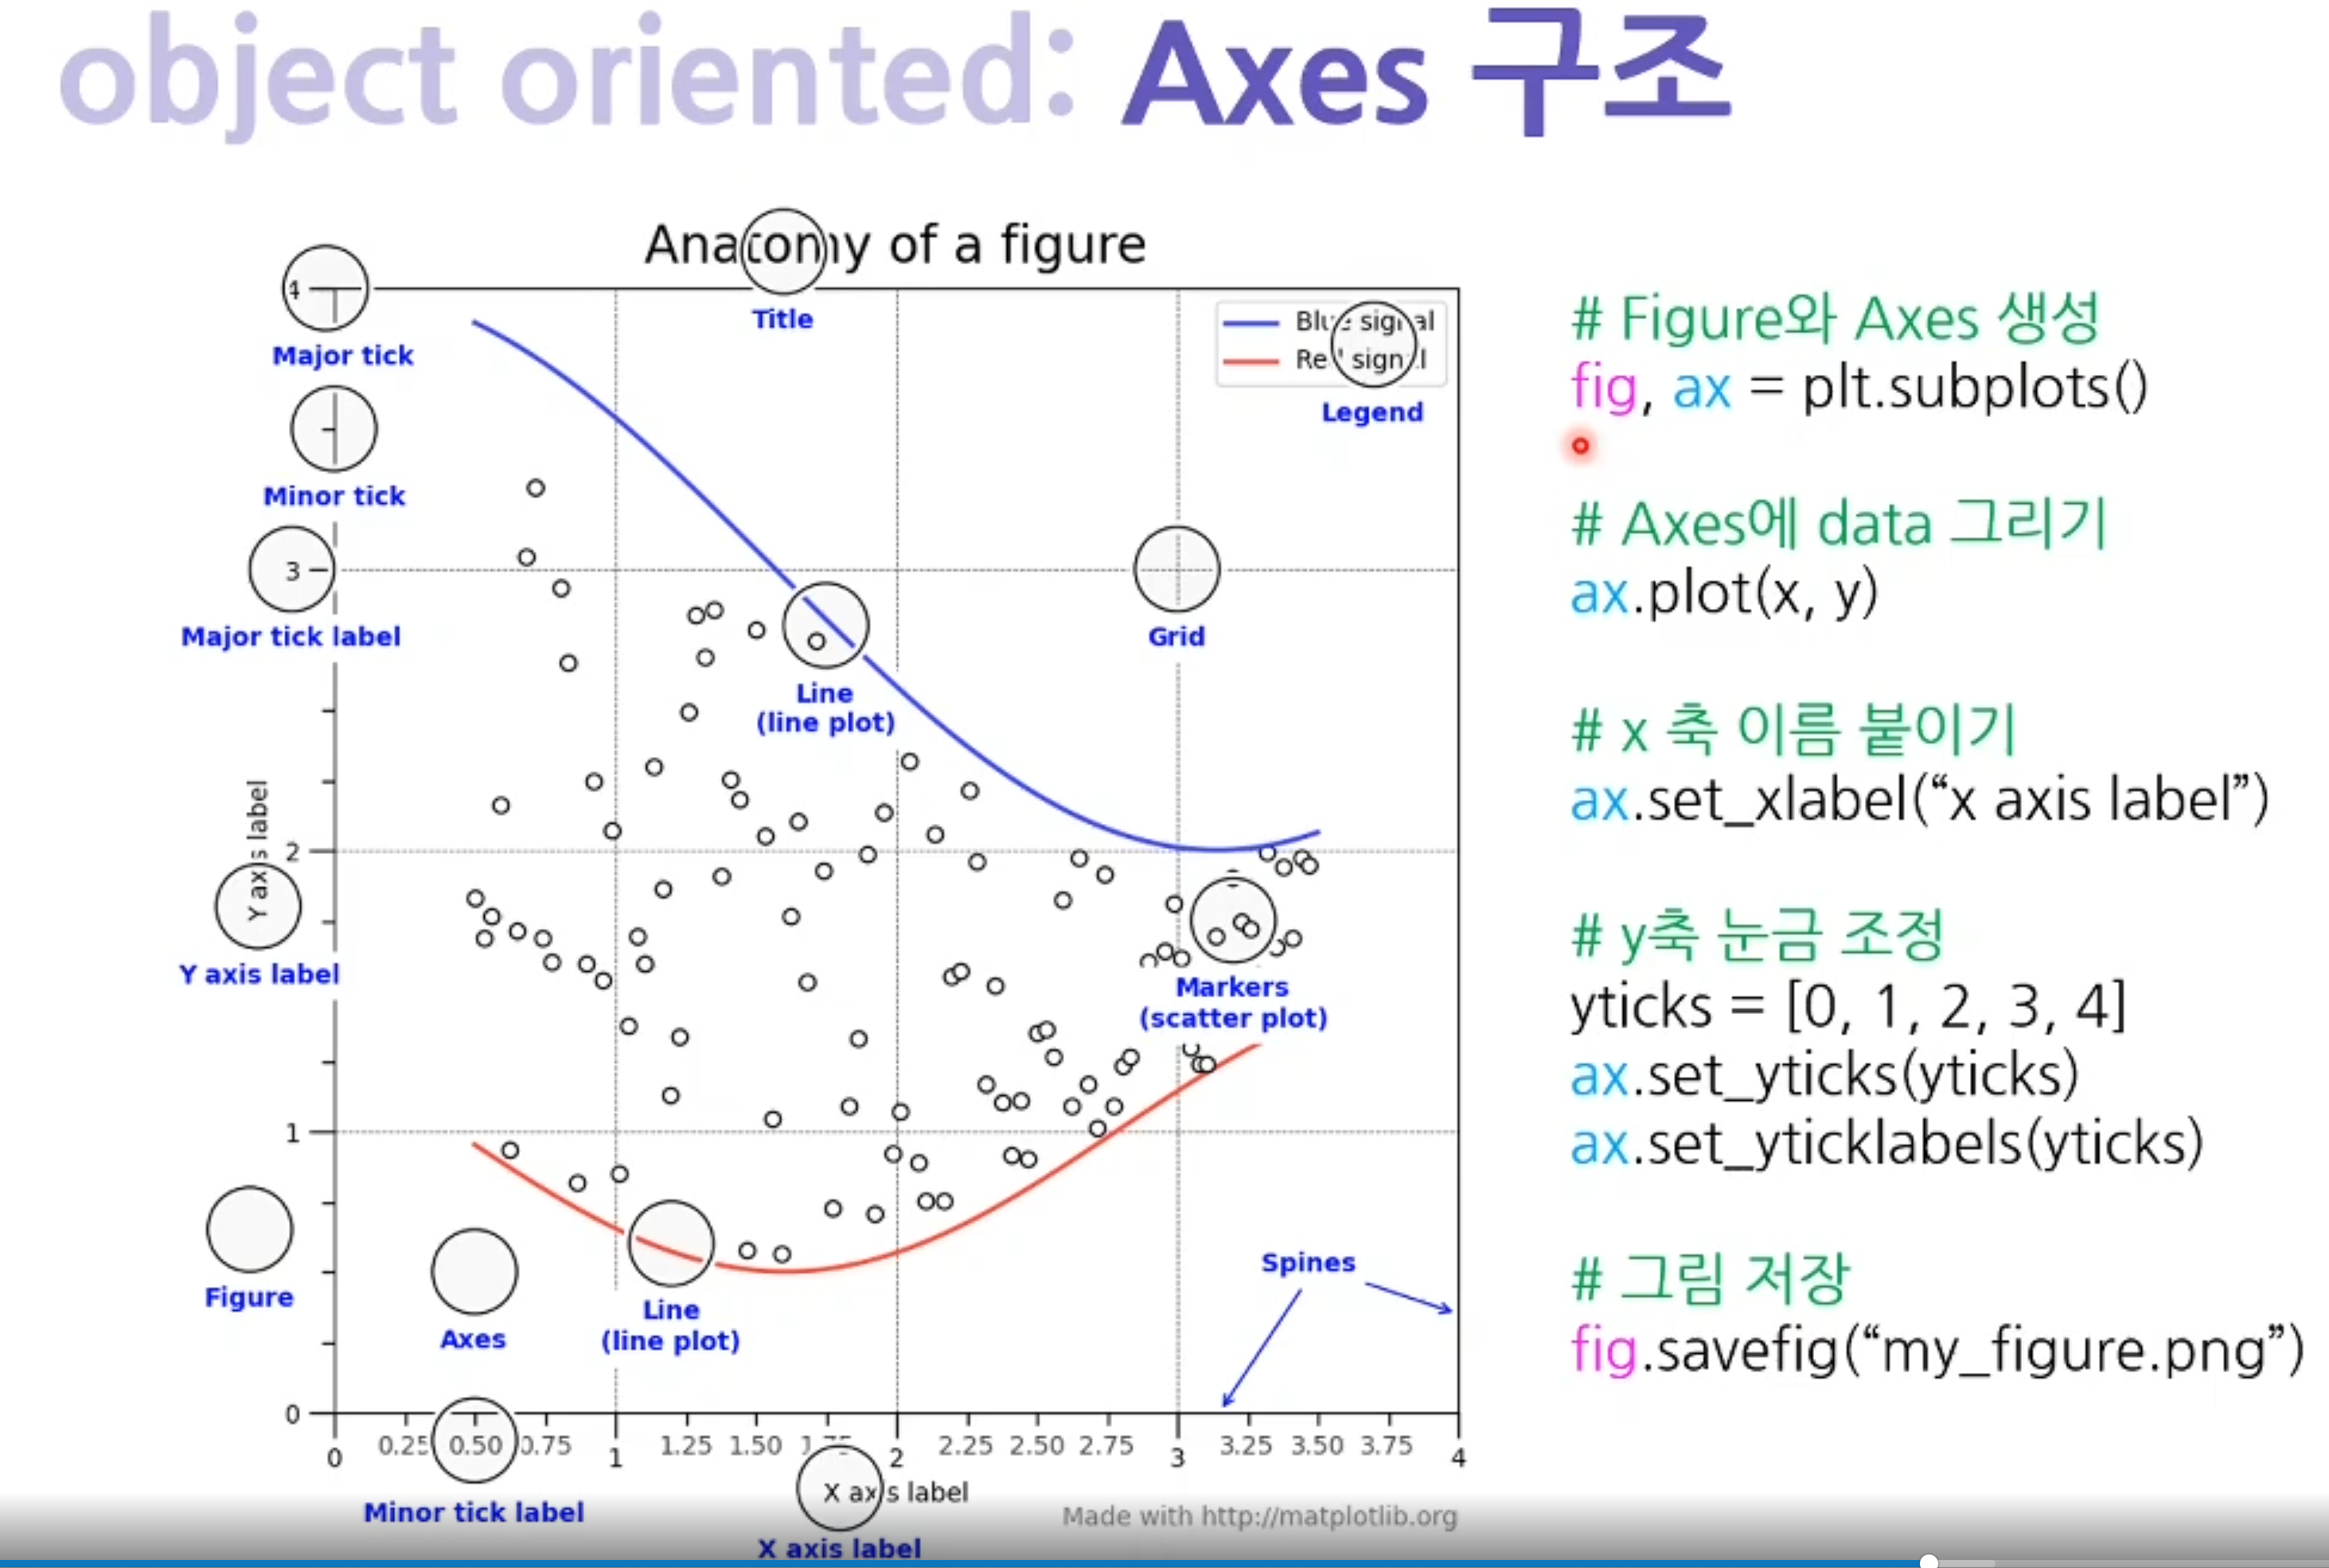
- save할 때 도화지를 저장하는 것이므로 fig 사용

In [6]:
# 3. 수익률 비교
# - 월별 평균 주가 연초 시초가로 나눔

sec_rate = np.array(sec)/sec[0] - 1 
kakao_rate = np.array(kakao)/kakao[0] - 1
lge_rate = np.array(lge)/lge[0] - 1
hdm_rate = np.array(hdm)/hdm[0] - 1

C:\Users\User\anaconda3\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


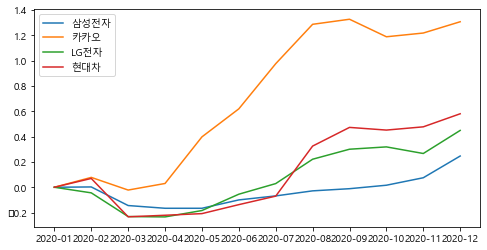

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(m2020, sec_rate, label="삼성전자")
ax.plot(m2020, kakao_rate, label="카카오")
ax.plot(m2020, lge_rate, label="LG전자")
ax.plot(m2020, hdm_rate, label="현대차")
ax.legend()

(-0.5, 1.5)

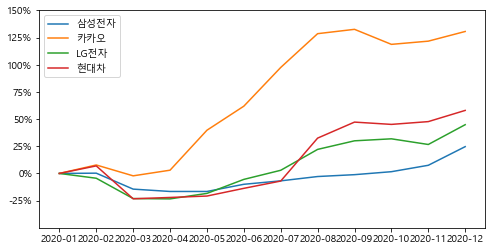

In [15]:
# 4. y축 눈금 정비, - 사라짐 문제 해결

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(m2020, sec_rate, label="삼성전자")
ax.plot(m2020, kakao_rate, label="카카오")
ax.plot(m2020, lge_rate, label="LG전자")
ax.plot(m2020, hdm_rate, label="현대차")
ax.legend()

yticks = np.arange(-0.25, 1.75, 0.25)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, ) # 꿀팁, 그래프가 아래에 너무 안붙어 있게 정리하게 하기 위함 

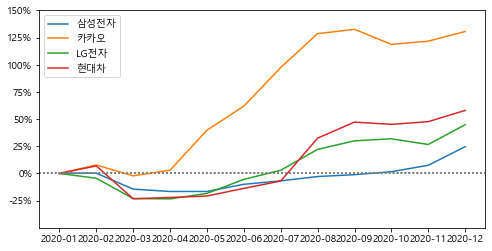

In [21]:
# 5. 손익이 잘 드러나게 변경

ax.axhline(y=0, c="gray", ls=":")
display(fig)

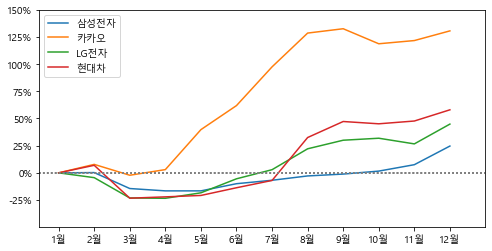

In [29]:
# 6. 가로축을 깔끔하게 변경

xticklabels = [f"{i}월" for i in range(1, 13)]
ax.set_xticks(range(0, 12))
ax.set_xticklabels(xticklabels)
display(fig)

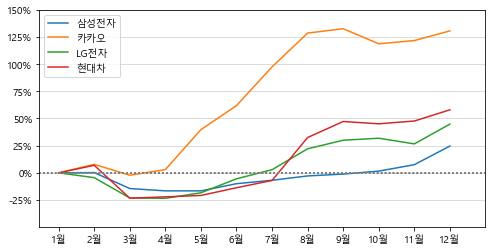

In [32]:
# 7. y축 grid 추가

ax.grid(axis="y", c="lightgray")
display(fig)

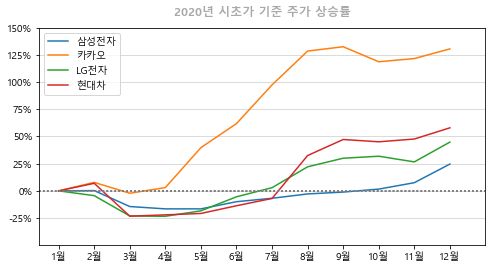

In [33]:
# 8. title 추가

ax.set_title("2020년 시초가 기준 주가 상승률", 
             fontweight="bold", fontsize="large", color="darkgray", pad=12) # pad: 그래프와 타이틀 사이의 거리 
display(fig)

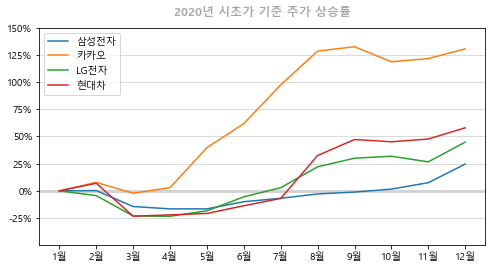

In [37]:
# 전체 코드 정리

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, sec_rate, label="삼성전자")  # line plot
ax.plot(m2020, kakao_rate, label="카카오")
ax.plot(m2020, lge_rate, label="LG전자")
ax.plot(m2020, hdm_rate, label="현대차")

xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, )

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점 *, zorder: layere 쌓는것 (앞에 넣지)

ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

ax.legend()

In [38]:
# 기업 색상 (RGB)

sec_c = np.array([52, 117, 162])/255   # np.array([12, 77, 162])/255 (원래색깔인데 현대와 구분하기 위해 조금 밝게 함)
kakao_c = np.array([230, 207, 1])/255  # np.array([250, 227, 1])/255 (조금 어둡게함)
lge_c = np.array([203, 10, 55])/255
hdm_c = np.array([1, 44, 95])/255

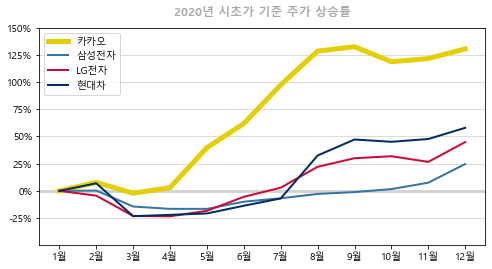

In [39]:
# 카카오 강조

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")  # line plot *
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, )

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점

ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

ax.legend()